<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_2.8_n250.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.152282,63.164964,67.398073,-167.178545,62.536774,215.867511,-153.330738
1,0.0,1.0,55.128700,66.514058,30.493663,257.128126,419.264546,213.466558,205.797988
2,0.0,2.0,57.776035,60.827440,69.627291,-197.385259,0.845508,113.051061,-112.205553
3,0.0,3.0,39.616906,45.877523,44.916352,-154.911800,-14.501019,120.080663,-134.581682
4,0.0,4.0,32.852253,25.285218,26.785110,20.982499,115.905081,142.224020,-26.318940
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,63.310516,95.926046,82.373758,-782.661898,-531.051577,29.897187,-560.948765
19996,999.0,16.0,51.688718,28.290576,41.023706,78.914114,209.917115,294.743522,-84.826407
19997,999.0,17.0,35.981718,85.418884,39.872934,69.895504,241.169039,337.026462,-95.857423
19998,999.0,18.0,78.156784,43.537790,40.170361,-25.681786,146.183150,144.709595,1.473555


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.152282,63.164964,67.398073,-167.178545,62.536774,215.867511,-153.330738
1,0.0,1.0,55.128700,66.514058,30.493663,257.128126,419.264546,213.466558,205.797988
2,0.0,2.0,57.776035,60.827440,69.627291,-197.385259,0.845508,113.051061,-112.205553
3,0.0,3.0,39.616906,45.877523,44.916352,-154.911800,-14.501019,120.080663,-134.581682
4,0.0,4.0,32.852253,25.285218,26.785110,20.982499,115.905081,142.224020,-26.318940
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,63.310516,95.926046,82.373758,-782.661898,-531.051577,29.897187,-560.948765
19996,999.0,16.0,51.688718,28.290576,41.023706,78.914114,209.917115,294.743522,-84.826407
19997,999.0,17.0,35.981718,85.418884,39.872934,69.895504,241.169039,337.026462,-95.857423
19998,999.0,18.0,78.156784,43.537790,40.170361,-25.681786,146.183150,144.709595,1.473555


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    89.152282  63.164964  ...  215.867511 -153.330738
      1.0    55.128700  66.514058  ...  213.466558  205.797988
      2.0    57.776035  60.827440  ...  113.051061 -112.205553
      3.0    39.616906  45.877523  ...  120.080663 -134.581682
      4.0    32.852253  25.285218  ...  142.224020  -26.318940
...                ...        ...  ...         ...         ...
999.0 15.0   63.310516  95.926046  ...   29.897187 -560.948765
      16.0   51.688718  28.290576  ...  294.743522  -84.826407
      17.0   35.981718  85.418884  ...  337.026462  -95.857423
      18.0   78.156784  43.537790  ...  144.709595    1.473555
      19.0   62.588775  85.839785  ...   92.533965  -95.386270

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    89.152282  63.164964  ...  215.867511 -153.330738
      1.0    55.128700  66.514058  ...  213.466558  205.797988
      2.0    57.776035  60.827440  ...  113.051061 -112.205553
      3.0    39.616906  45.877523  ...  120.080663 -134.581682
      4.0    32.852253  25.285218  ...  142.224020  -26.318940
...                ...        ...  ...         ...         ...
999.0 15.0   63.310516  95.926046  ...   29.897187 -560.948765
      16.0   51.688718  28.290576  ...  294.743522  -84.826407
      17.0   35.981718  85.418884  ...  337.026462  -95.857423
      18.0   78.156784  43.537790  ...  144.709595    1.473555
      19.0   62.588775  85.839785  ...   92.533965  -95.386270

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.152282,63.164964,67.398073,-167.178545,62.536774,215.867511,-153.330738
1,0.0,1.0,55.128700,66.514058,30.493663,257.128126,419.264546,213.466558,205.797988
2,0.0,2.0,57.776035,60.827440,69.627291,-197.385259,0.845508,113.051061,-112.205553
3,0.0,3.0,39.616906,45.877523,44.916352,-154.911800,-14.501019,120.080663,-134.581682
4,0.0,4.0,32.852253,25.285218,26.785110,20.982499,115.905081,142.224020,-26.318940
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,63.310516,95.926046,82.373758,-782.661898,-531.051577,29.897187,-560.948765
19996,999.0,16.0,51.688718,28.290576,41.023706,78.914114,209.917115,294.743522,-84.826407
19997,999.0,17.0,35.981718,85.418884,39.872934,69.895504,241.169039,337.026462,-95.857423
19998,999.0,18.0,78.156784,43.537790,40.170361,-25.681786,146.183150,144.709595,1.473555


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    89.152282  63.164964  ...  215.867511 -153.330738
      1.0    55.128700  66.514058  ...  213.466558  205.797988
      2.0    57.776035  60.827440  ...  113.051061 -112.205553
      3.0    39.616906  45.877523  ...  120.080663 -134.581682
      4.0    32.852253  25.285218  ...  142.224020  -26.318940
...                ...        ...  ...         ...         ...
999.0 15.0   63.310516  95.926046  ...   29.897187 -560.948765
      16.0   51.688718  28.290576  ...  294.743522  -84.826407
      17.0   35.981718  85.418884  ...  337.026462  -95.857423
      18.0   78.156784  43.537790  ...  144.709595    1.473555
      19.0   62.588775  85.839785  ...   92.533965  -95.386270

[20000 rows x 7 columns]

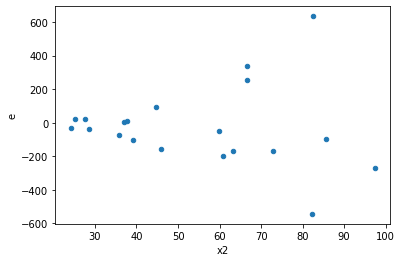

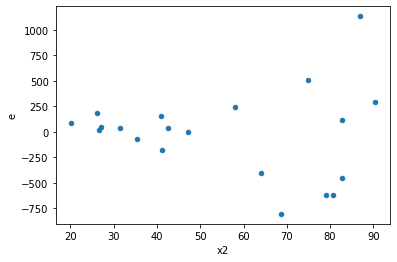

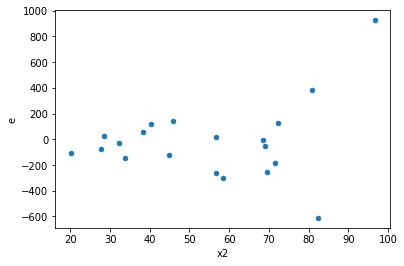

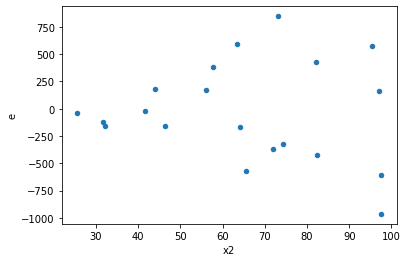

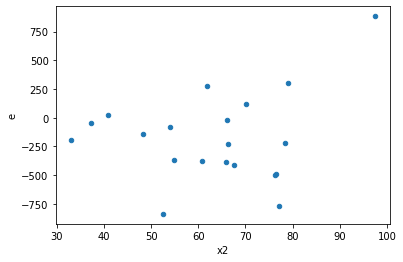

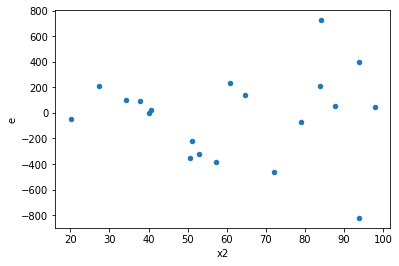

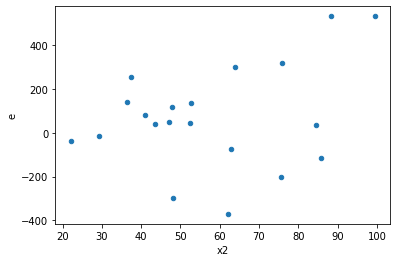

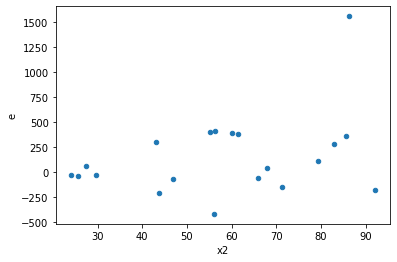

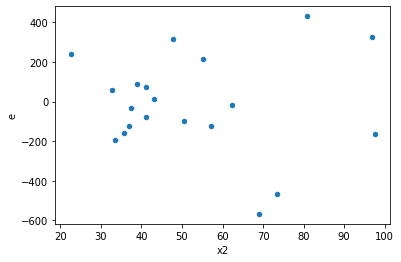

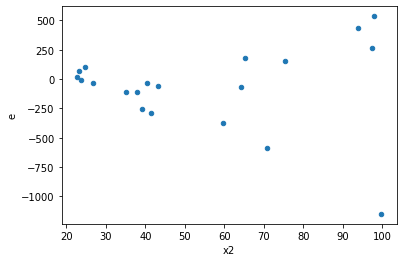

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,10604.375087048193,672414.863344287,2120.8750174096385,134482.9726688574,63.409192698733435,0.00032091963349634156,0.9998395401832518,0.00016045981674817078,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,56080.720210524596,1727052.2649046818,11216.14404210492,345410.4529809364,30.795828912706586,0.0018420852390244047,0.9990789573804878,0.0009210426195122023,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,20731.609667198234,538796.6721579912,4146.321933439647,107759.33443159824,25.989138364421397,0.0027579975227545184,0.9986210012386227,0.0013789987613772592,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,88134.30526544747,2384059.104775027,17626.861053089495,476811.82095500536,27.050296676130753,0.002508369884362649,0.9987458150578187,0.0012541849421813245,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,358797.21255003684,1067355.8954297185,71759.44251000737,213471.1790859437,2.9748165763157037,0.2566741243229864,0.8716629378385068,0.1283370621614932,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,66796.94238113871,83870.32964868676,13359.388476227741,16774.065929737353,1.2556013293262511,0.8088573334281564,0.5955713332859218,0.4044286667140782,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,43688.697470298466,413621.2141278634,8737.739494059693,82724.24282557268,9.467464998448664,0.027571443802060003,0.98621427809897,0.013785721901030001,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,37853.89955103313,1265487.780554095,7570.779910206626,253097.55611081902,33.430843204093534,0.0015135944480195729,0.9992432027759902,0.0007567972240097864,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,123246.38024794214,577492.606694047,24649.27604958843,115498.5213388094,4.685676005512458,0.1153226101415239,0.942338694929238,0.05766130507076195,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,10604.375087048193,672414.863344287,2120.8750174096385,134482.9726688574,63.409192698733435,0.00032091963349634156,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,56080.720210524596,1727052.2649046818,11216.14404210492,345410.4529809364,30.795828912706586,0.0018420852390244047,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,20731.609667198234,538796.6721579912,4146.321933439647,107759.33443159824,25.989138364421397,0.0027579975227545184,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,88134.30526544747,2384059.104775027,17626.861053089495,476811.82095500536,27.050296676130753,0.002508369884362649,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,358797.21255003684,1067355.8954297185,71759.44251000737,213471.1790859437,2.9748165763157037,0.2566741243229864,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,66796.94238113871,83870.32964868676,13359.388476227741,16774.065929737353,1.2556013293262511,0.8088573334281564,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,43688.697470298466,413621.2141278634,8737.739494059693,82724.24282557268,9.467464998448664,0.027571443802060003,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,37853.89955103313,1265487.780554095,7570.779910206626,253097.55611081902,33.430843204093534,0.0015135944480195729,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,123246.38024794214,577492.606694047,24649.27604958843,115498.5213388094,4.685676005512458,0.1153226101415239,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      660
Reject001=0 : Heteroscedasticity    340
Name: Result_test, dtype: int64